In [1]:
# Load libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

plt.rcParams['axes.linewidth'] = 1.5

In [2]:
# Load Tingskullen data
tk = pd.read_csv('Data/Wu_etal_trim.csv')
tk.head()

,Depth,Formation,SampleID,d13C,d18O,Depth_Negative,age,biozone
0,0.10,Persnäs,TK 100,0.49,-6.17,-0.10,457.923775,pygodus anserinus
1,0.50,Persnäs,TK 99,0.78,-6.05,-0.50,458.046159,pygodus anserinus
2,0.75,Persnäs,AK 98b,0.81,-6.23,-0.75,458.122649,pygodus anserinus
3,1.00,Persnäs,TK 98,0.75,-6.11,-1.00,458.199139,pygodus anserinus
4,1.25,Persnäs,AK 97b,0.80,-6.60,-1.25,458.275629,pygodus anserinus


In [3]:
# Load kergurta data
kg = pd.read_csv('Data/kergurta.csv')
kg.head()

,depth,meter,stage,formation,d13c,d18o,age,Stage
0,106.80,84.95,Nabala,Paekna,-0.29,-5.59,452.5,Katian
1,108.45,83.30,Rakvere,Rägavere,-0.28,-5.10,452.6,Katian
2,110.80,80.95,Rakvere,Rägavere,-0.24,-5.44,452.8,Katian
3,111.70,80.05,Rakvere,Rägavere,-0.50,-5.97,452.9,Katian
4,113.50,78.25,Rakvere,Rägavere,0.00,-5.56,453.0,Sandbian


In [4]:
# Convert age model kergurta from GTS 2012 to GTS 2020
gts = pd.read_csv('Data/Ordovician_Stages_GTS.csv')
f_gts = interp1d(gts['GTS2012'], gts['GTS2020'])

kg['age20'] = f_gts(kg['age'])

In [5]:
kg.head()

,depth,meter,stage,formation,d13c,d18o,age,Stage,age20
0,106.80,84.95,Nabala,Paekna,-0.29,-5.59,452.5,Katian,452.266667
1,108.45,83.30,Rakvere,Rägavere,-0.28,-5.10,452.6,Katian,452.363333
2,110.80,80.95,Rakvere,Rägavere,-0.24,-5.44,452.8,Katian,452.556667
3,111.70,80.05,Rakvere,Rägavere,-0.50,-5.97,452.9,Katian,452.653333
4,113.50,78.25,Rakvere,Rägavere,0.00,-5.56,453.0,Sandbian,452.750000


In [6]:
# Load Data Clear Spring (cs)
cs_c = pd.read_csv('Data/ClearSpring_Ordo_C.csv')
cs_c.head()

,Sample ID,Age (Ma),meter,formation,d13c,d81o,d13corg,D13C,toc,age,stage,age20
0,2412,470.42,0.0,Rockdale Run,-2.06,-6.99,-30.96,28.9,0.035,470.42,Floian,471.58
1,2413,470.34,2.0,Rockdale Run,-1.82,-6.53,NaN,NaN,NaN,470.34,Floian,471.52
2,2414,470.26,4.0,Rockdale Run,-2.67,-4.74,NaN,NaN,NaN,470.26,Floian,471.46
3,2416,470.10,8.0,Rockdale Run,-4.91,-8.06,NaN,NaN,NaN,470.10,Floian,471.34
4,2419,469.86,14.0,Rockdale Run,-3.58,-7.81,NaN,NaN,NaN,469.86,Dapingian,471.16


In [7]:
# Load Meiklejohn Peak Data
mp = pd.read_csv('Data/MeiklejohnC.csv')
mp.head(3)

,SampleID,Meter,MeterComp,Formation,d13c,d18o,d13corg,D13C,Age,Facies,F_Num,FaciesAssociation,Fa_Num
0,330278.2,271.0,580.0,Upper Mbr. AVLS,-2.222833,-8.434089,-28.462173,26.239340,455.82,F2E,1,FA5,1
1,330278.1,270.0,579.0,Upper Mbr. AVLS,-2.713545,-10.314913,-27.679694,24.966149,455.88,F2E,1,FA5,1
2,330278.0,265.0,574.0,Upper Mbr. AVLS,-2.122432,-9.102578,-28.320312,26.197880,455.94,F2E,1,FA5,1


In [8]:
# TK Suecicus Range (strat height)
tk_sue = [461.6864567, 464.8801575]

mp_sue = [462.48, 464.44]

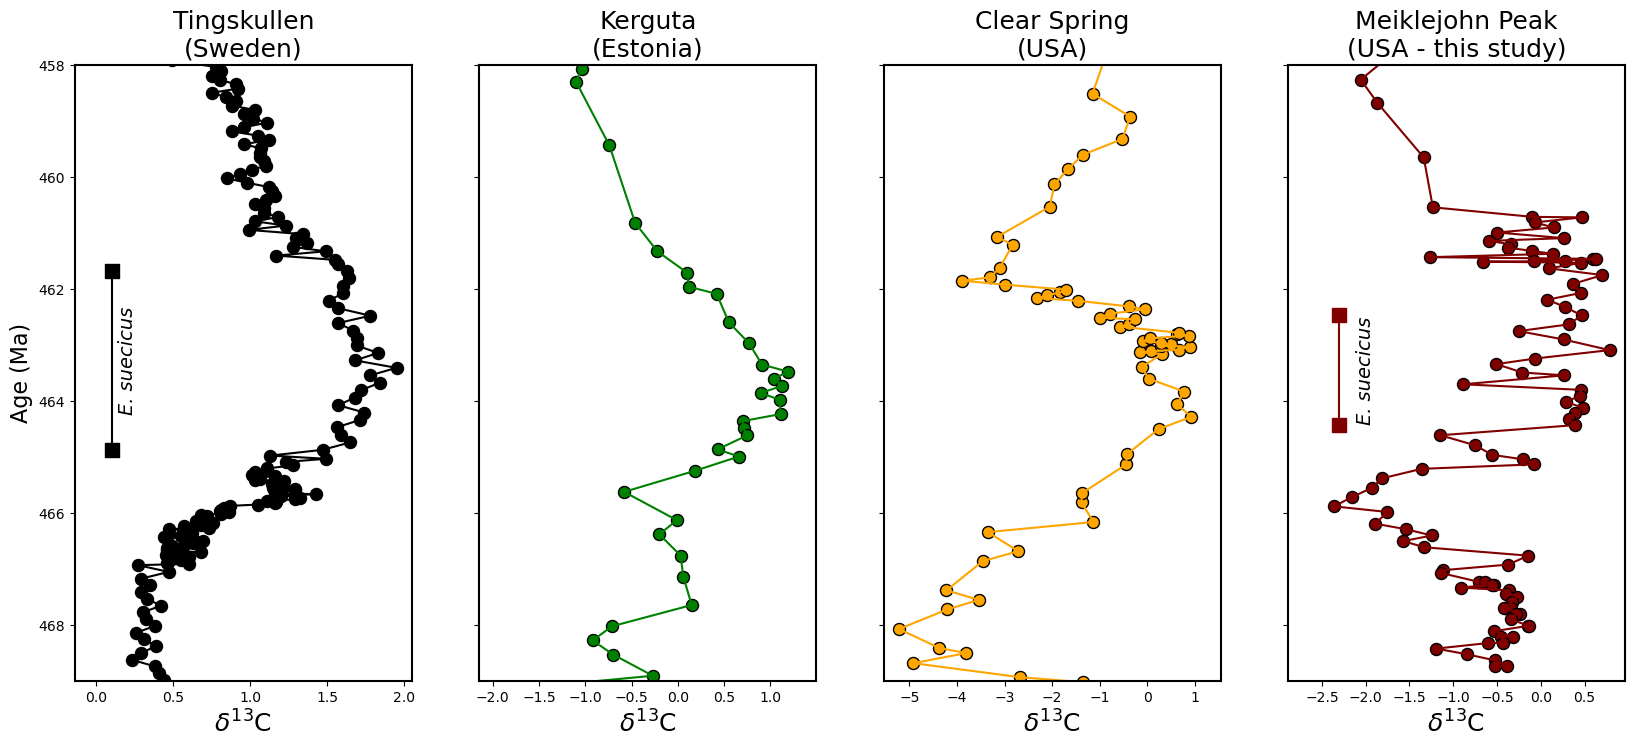

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 8), sharey=True)

# Tingskullen
ax1.scatter(tk['d13C'], tk['age'], ec='k', fc='k', s=75)
ax1.plot(tk['d13C'], tk['age'], 'k-')
ax1.set_ylim(469, 458)
ax1.set_ylabel('Age (Ma)', fontsize = 16)
ax1.set_title('Tingskullen\n(Sweden)', fontsize=18)
# E. suecicus range
ax1.scatter([0.1, 0.1], tk_sue, ec='k', fc='k', s=100, marker='s')
ax1.plot([0.1, 0.1], tk_sue, c='k')
ax1.text(0.2, tk_sue[0]+(tk_sue[1]-tk_sue[0])/2, 'E. suecicus', rotation=90, 
         ha='center', va='center', fontsize=14, fontstyle='italic')


# Kergurta
ax2. scatter(kg['d13c'], kg['age20'], ec='k', fc='g', s=75)
ax2. plot(kg['d13c'], kg['age20'], 'g-')
ax2.set_title('Kerguta\n(Estonia)', fontsize=18)

# Clear Spring
ax3.scatter(cs_c['d13c'], cs_c['age20'], ec='k', fc='orange', s=75)
ax3.plot(cs_c['d13c'], cs_c['age20'], c='orange')
ax3.set_title('Clear Spring\n(USA)', fontsize=18)

# Meiklejohn Peak
ax4.scatter(mp['d13c'], mp['Age'], ec='k', fc='maroon', s=75)
ax4.plot(mp['d13c'], mp['Age'], c='maroon')
ax4.set_title('Meiklejohn Peak\n(USA - this study)', fontsize=18)
# E. suecicus range
ax4.scatter([-2.3, -2.3], mp_sue, ec='maroon', fc='maroon', s=100, marker='s')
ax4.plot([-2.3, -2.3], mp_sue, c='maroon')
ax4.text(-2, mp_sue[0]+(mp_sue[1]-mp_sue[0])/2, 'E. suecicus', rotation=90, 
         ha='center', va='center', fontsize=14, fontstyle='italic')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('$\delta^{13}$C', fontsize=18)


plt.savefig('Figure/MDICE_Correlation.svg')
plt.savefig('Figure/MDICE_Correlation.png', dpi=300)

Text(0.5, 0, '$\\delta^{13}$C')

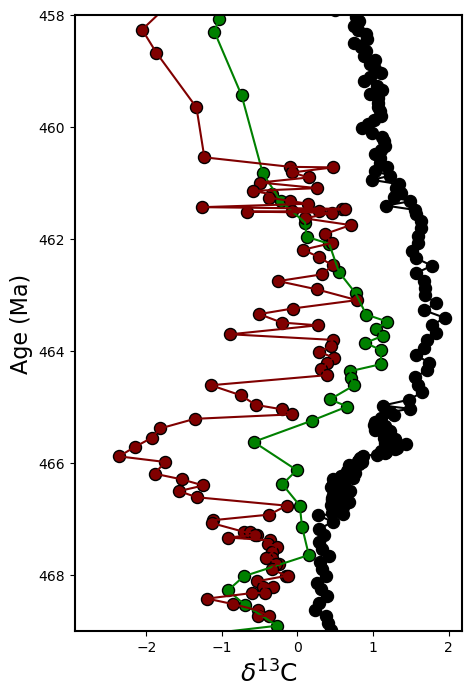

In [10]:
fig, ax = plt.subplots(figsize=(5, 8))

ax.scatter(tk['d13C'], tk['age'], ec='k', fc='k', s=75)
ax.plot(tk['d13C'], tk['age'], 'k-')

ax. scatter(kg['d13c'], kg['age20'], ec='k', fc='g', s=75)
ax. plot(kg['d13c'], kg['age20'], 'g-')

# ax.scatter(cs_c['d13c'], cs_c['age20'], ec='k', fc='orange', s=75)
# ax.plot(cs_c['d13c'], cs_c['age20'], c='orange')

ax.scatter(mp['d13c'], mp['Age'], ec='k', fc='maroon', s=75)
ax.plot(mp['d13c'], mp['Age'], c='maroon')

ax.set_ylim(469, 458)
ax.set_ylabel('Age (Ma)', fontsize = 16)
ax.set_xlabel('$\delta^{13}$C', fontsize=18)

-33.187082271970795


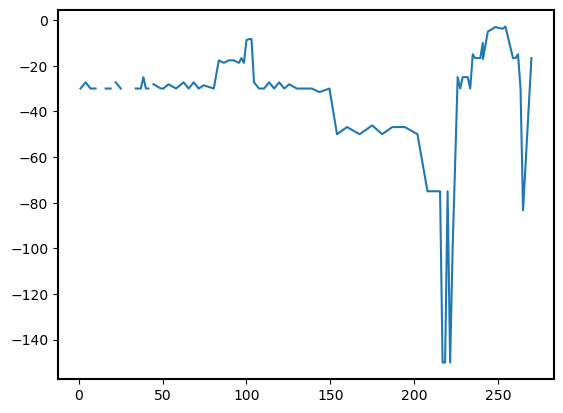

In [17]:
mp['sedrate'] = mp['Meter'].diff() / mp['Age'].diff()
plt.plot(mp.Meter, mp.sedrate)
print(np.average(mp.sedrate.dropna()))

7.172411952866885


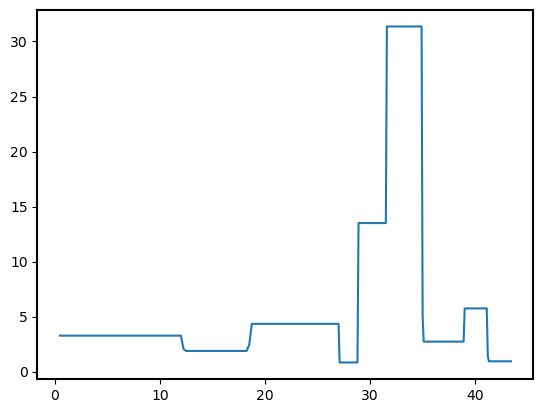

In [18]:
tk['sedrate'] = tk['Depth'].diff() / tk['age'].diff()
plt.plot(tk.Depth, tk.sedrate)
print(np.average(tk.sedrate.dropna()))

inf


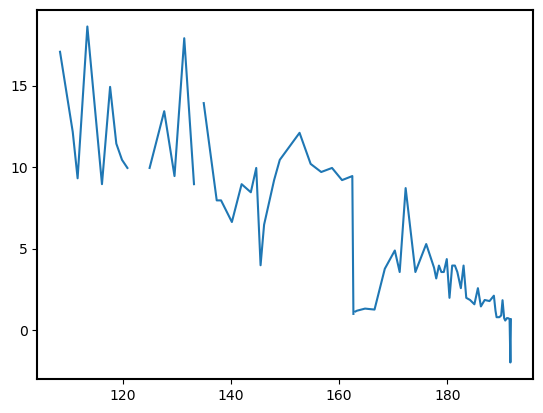

In [26]:
kg['sedrate'] = kg['depth'].diff() / kg['age20'].diff()
plt.plot(kg.depth, kg.sedrate)
kg.replace([np.inf, -np.inf], np.nan)
print(np.average(kg.sedrate.dropna()))

In [33]:
kgnew = kg.dropna()
kgnew
print(np.average(kgnew['sedrate']))

inf


In [40]:
kgnew = kgnew.replace([np.inf], 0)
print(np.average(kgnew['sedrate']))

5.276646839513706


-39.943665145298894


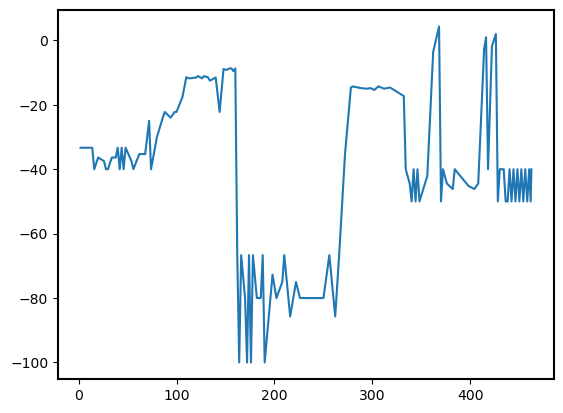

In [41]:
cs_c['sedrate'] = cs_c['meter'].diff() / cs_c['age20'].diff()
plt.plot(cs_c.meter, cs_c.sedrate)
print(np.average(cs_c.sedrate.dropna()))

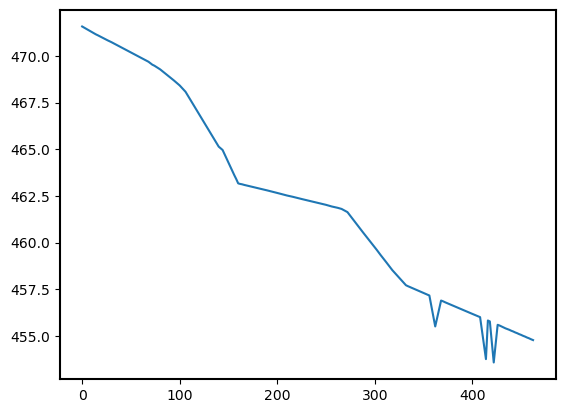

In [42]:
plt.plot(cs_c.meter, cs_c.age20)